In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import itertools
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go

In [79]:
data1 = np.random.rand(8, 8)
data2 = np.random.rand(8, 8)
tie1 = np.random.rand(8, 8)
tie2 = np.random.rand(8, 8)
n = 1
test_data = {'Cards':data1, 'Card_Ties':tie1, 'Tricks':data2, 'Trick_Ties':tie2, 'n':n}

In [80]:
def create_viz(format):
    data = test_data #dictionary with 4 8x8 arrays containing probabilities in 0.xx... format: card win, trick win,
                    #card ties, and trick ties and n with the keys: 'Cards','Tricks','Card_Ties','Trick Ties','n'
    var_cards = (data['Cards'] * 100).transpose()
    var_tricks = (data['Tricks'] * 100).transpose()
    n = data['n']
    card_ties = (data['Card_Ties'] * 100).transpose()
    trick_ties = (data['Trick_Ties'] * 100).transpose()
    
    card_labs = []
    trick_labs = []
    for i in range(8):
        card_lab_temp = []
        trick_lab_temp = []
        for j in range(8):
            card_lab_temp.append(str(round(var_cards[i][j]))+'('+str(round(card_ties[i][j]))+')')
            trick_lab_temp.append(str(round(var_tricks[i][j]))+'('+str(round(trick_ties[i][j]))+')')
        card_labs.append(card_lab_temp)
        trick_labs.append(trick_lab_temp)
    card_labs = np.reshape(card_labs,(8,8))
    trick_labs = np.reshape(trick_labs,(8,8))
    np.fill_diagonal(var_cards, None)
    np.fill_diagonal(var_tricks, None)
    np.fill_diagonal(card_ties, None)
    np.fill_diagonal(trick_ties, None)
    np.fill_diagonal(card_labs, '')
    np.fill_diagonal(trick_labs, '')
    
    x_axis_labels = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'] #player 1 
    y_axis_labels = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'] #player 2
    
    if format == 'png':
        fig, ax = plt.subplots(figsize = (10,8))
        sns.heatmap(var_cards, annot= card_labs, annot_kws={"size": 10},linewidths=.5, cmap='Blues', fmt="",
                    ax=ax, cbar=False, vmin=0, vmax=100)
        ax.set_title("Probability (%) of Player 1 Winning Penney's Game by Cards\n(n="+str(n)+'), [Win(Tie)]', fontsize = 17)
        ax.set_xlabel('Player 1 Guesses', fontsize=14)
        ax.set_ylabel('Player 2 Guesses', fontsize=14)
        ax.set_xticklabels(x_axis_labels, fontsize=12)
        ax.set_yticklabels(y_axis_labels, fontsize=12)
        ax.set_facecolor('slategray')
        
        cbar_ax = fig.add_axes([.95, 0.11, 0.02, .77])
        cb = fig.colorbar(ax.collections[0], cax=cbar_ax)
        cb.outline.set_linewidth(.2)
        
        plt.savefig('figures/h3eatmap_cards_n'+str(n)+'.png', bbox_inches = 'tight', facecolor = 'white')
        plt.show()
########
        fig, ax = plt.subplots(figsize = (10,8))
        sns.heatmap(var_tricks, annot= trick_labs, annot_kws={"size": 10},linewidths=.5, cmap='Blues', fmt="",
                    
                    ax=ax, cbar=False, vmin=0, vmax=100)
        ax.set_title("Probability (%) of Player 1 Winning Penney's Game by Tricks\n(n="+str(n)+'), [Win(Tie)]', fontsize = 17)
        ax.set_xlabel('Player 1 Guesses', fontsize=14)
        ax.set_ylabel('Player 2 Guesses', fontsize=14)
        ax.set_xticklabels(x_axis_labels, fontsize=12)
        ax.set_yticklabels(y_axis_labels, fontsize=12)
        ax.set_facecolor('slategray')
        
        cbar_ax = fig.add_axes([.95, 0.11, 0.02, .77])
        cb = fig.colorbar(ax.collections[0], cax=cbar_ax)
        cb.outline.set_linewidth(.2)
        
        plt.savefig('figures/h3eatmap_tricks_n'+str(n)+'.png', bbox_inches = 'tight', facecolor = 'white')
        plt.show()
    elif format == 'html':
        fig = go.Figure(data = go.Heatmap(
                z = var_cards, colorscale = 'Blues', customdata = card_ties,
                hovertemplate = "P1: %{x}, P2: %{y}<br />Win Probability: %{z:.0f}<br />Tie Probability: %{customdata:.0f}", name = "", # the name part stops 'trace=0' from popping up
                text=card_labs, texttemplate='%{text}',
                x = x_axis_labels, y = ['RRR','RRB','RBR','RBB','BRR','BRB','BBR','BBB'], hoverongaps = False,
                colorbar=dict(
                    tickvals=[0, 20, 40, 60, 80, 100],  # Positions of the ticks
                    ticktext=[0, 20, 40, 60, 80, 100],   # Labels for the ticks
                    outlinewidth=1,  # Thin outline width
                    outlinecolor='gray' 
                ),
                zmin=0,
                zmax=100
        ))
        fig.update_layout(yaxis=dict(autorange='reversed'))
        fig.update_layout(plot_bgcolor='grey', 
                          title = "Probability (%) of Player 1 Winning Penney's Game by Cards<br>(n="+str(n)+'), [Win(Tie)]', 
                          title_x = 0.5, title_y = .95, title_font_size = 20, 
                          xaxis = dict(title = 'Player 1 Guesses'),
                          yaxis = dict(title = 'Player 2 Guesses'), width = 800, height = 800)
        fig.update_traces(xgap = 1, ygap = 1)
        fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
        fig.show()
        path = 'figures/h3eatmap_cards_n'+str(n)+'.html'
        fig.write_html(path)
########
        fig = go.Figure(data = go.Heatmap(
                z = var_tricks, colorscale = 'Blues', customdata = trick_ties,
                hovertemplate = "P1: %{x}, P2: %{y}<br />Win Probability: %{z:.0f}<br />Tie Probability: %{customdata:.0f}", name = "",
                text=trick_labs, texttemplate='%{text}',
                x = x_axis_labels, y = ['RRR','RRB','RBR','RBB','BRR','BRB','BBR','BBB'], hoverongaps = False,
                colorbar=dict(
                    tickvals=[0, 20, 40, 60, 80, 100],  # Positions of the ticks
                    ticktext=[0, 20, 40, 60, 80, 100],   # Labels for the ticks
                    outlinewidth=1,  # Thin outline width
                    outlinecolor='gray' 
                ),
                zmin=0,
                zmax=100
        ))
        fig.update_layout(yaxis=dict(autorange='reversed'))
        fig.update_layout(plot_bgcolor='grey',
                          title = "Probability (%) of Player 1 Winning Penney's Game by Tricks<br>(n="+str(n)+'), [Win(Tie)]',
                          title_x = 0.5, title_y = .95, title_font_size = 20, 
                          xaxis = dict(title = 'Player 1 Guesses'), 
                          yaxis = dict(title = 'Player 2 Guesses'), width = 800, height = 800)
        fig.update_traces(xgap = 1, ygap = 1)
        fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
        fig.show()
        path = 'figures/h3eatmap_tricks_n'+str(n)+'.html'
        fig.write_html(path)
    else:
        print('format unsupported')
    return

In [81]:
create_viz('lng')

format unsupported


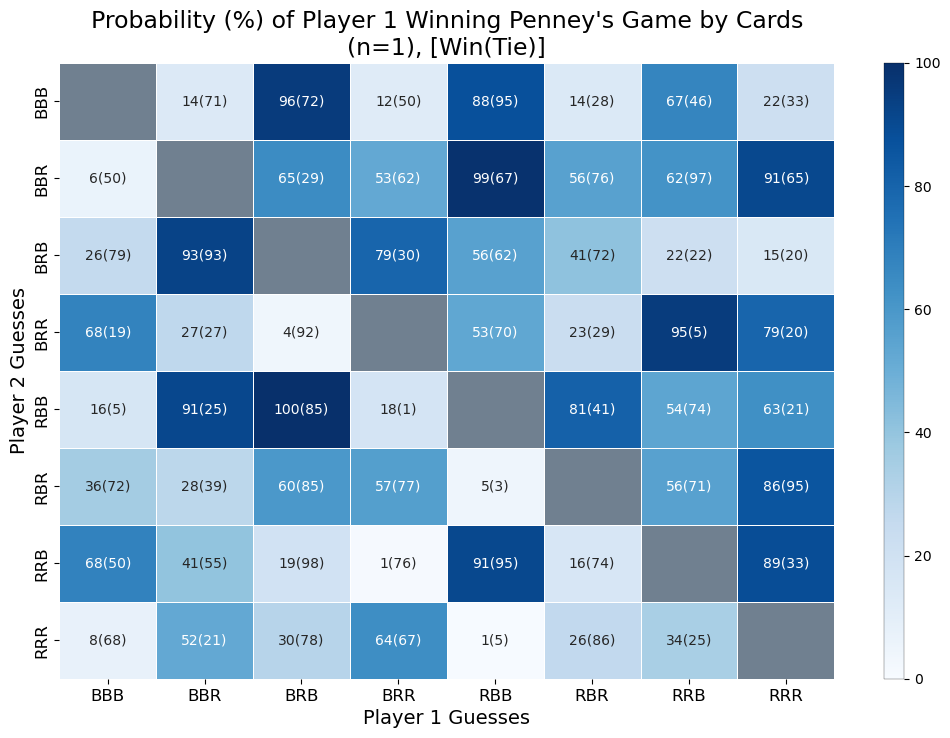

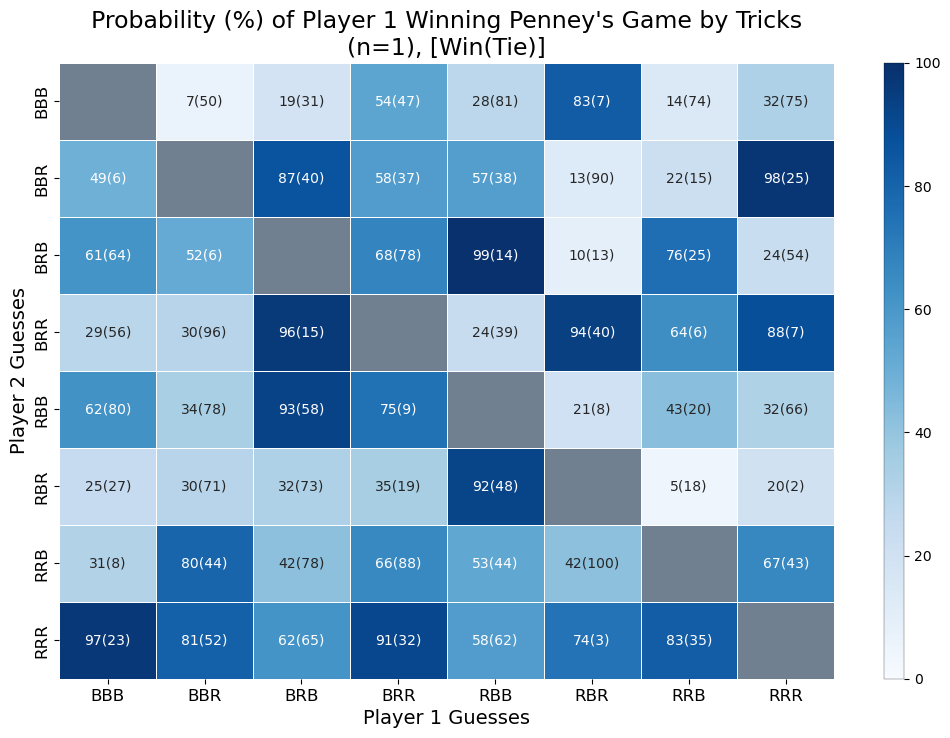

In [82]:
create_viz('png')

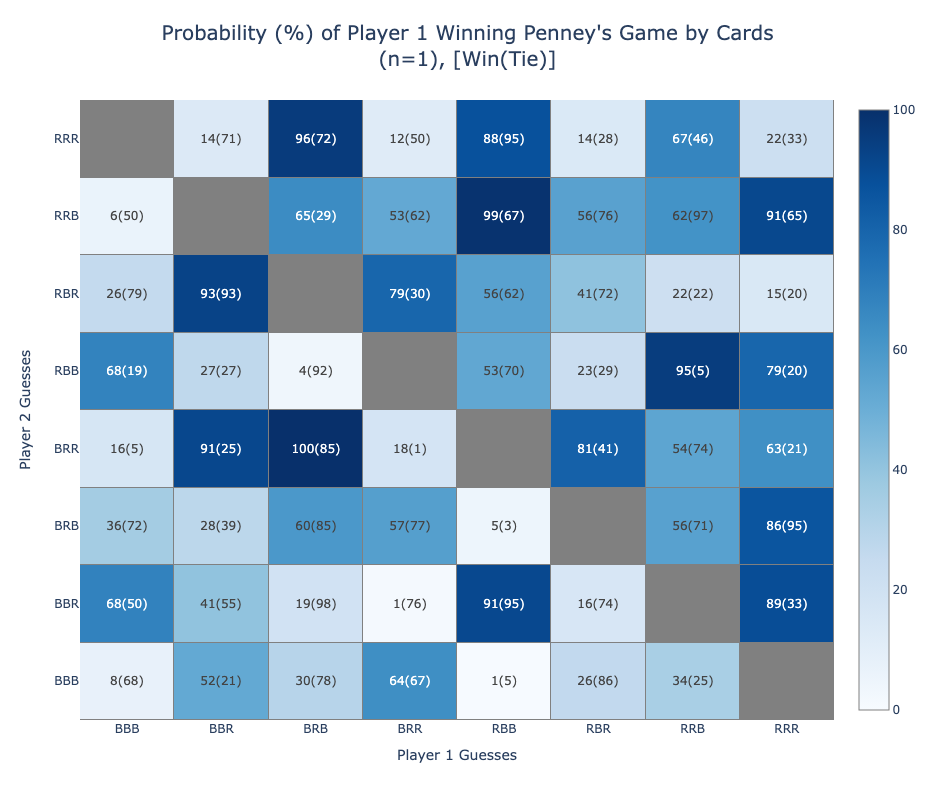

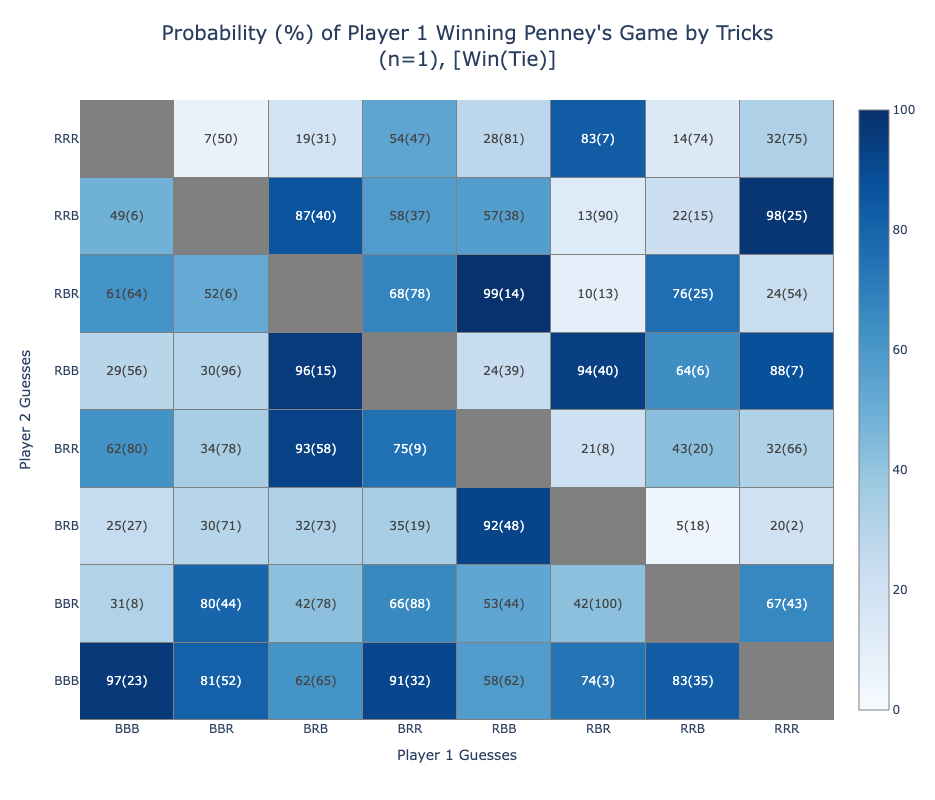

In [83]:
create_viz('html')

In [ ]:
cards = test_data['Cards']
var_cards = cards * 100
tricks = test_data['Tricks']
var_tricks = tricks * 100
n = test_data['n']
Cties = test_data['Card_Ties']
card_ties = Cties * 100
Tties = test_data['Trick_Ties']
trick_ties = Tties * 100
#print(var_cards, var_tricks, n, card_ties, trick_ties)
full_cards = []
full_tricks = []
#for i in var_cards:
i=0
while i < len(var_cards):
    Ctemp = []
    Ttemp = []
    Cprob_arr = var_cards[i]
    Ctie_arr = card_ties[i]
    Tprob_arr = var_tricks[i]
    Ttie_arr = trick_ties[i]
    j = 0
    while j < len(Cprob_arr):
        #print(round(prob_arr[0]))
        Chold1 = round(Cprob_arr[j])
        Chold2 = round(Ctie_arr[j])
        Ctemp.append(str(Chold1)+' ('+str(Chold2)+')')
        Thold1 = round(Tprob_arr[j])
        Thold2 = round(Ttie_arr[j])
        Ttemp.append(str(Thold1)+'('+str(Thold2)+')')
        j += 1
    full_cards.append(Ctemp)
    full_tricks.append(Ttemp)
    i += 1
#print(var_tricks[0])

In [36]:
print(full_cards)
print(full_tricks)

[['59 (31)', '74 (48)', '18 (47)', '18 (24)', '73 (3)', '60 (79)', '90 (84)', '60 (85)'], ['8 (15)', '71 (41)', '18 (85)', '86 (43)', '99 (91)', '44 (56)', '8 (73)', '57 (23)'], ['39 (33)', '70 (95)', '11 (45)', '10 (93)', '18 (65)', '74 (69)', '27 (40)', '75 (74)'], ['82 (58)', '73 (48)', '100 (81)', '26 (59)', '24 (68)', '65 (37)', '28 (1)', '46 (50)'], ['7 (62)', '28 (70)', '26 (61)', '90 (46)', '59 (44)', '20 (90)', '75 (20)', '81 (16)'], ['71 (83)', '25 (70)', '68 (98)', '85 (19)', '34 (91)', '46 (87)', '75 (79)', '99 (47)'], ['73 (18)', '79 (49)', '94 (35)', '24 (17)', '28 (49)', '52 (87)', '12 (8)', '7 (83)'], ['1 (93)', '30 (70)', '39 (96)', '78 (62)', '38 (41)', '27 (80)', '9 (27)', '100 (46)']]
[['31(69)', '69(31)', '58(1)', '30(79)', '4(50)', '10(100)', '95(46)', '23(42)'], ['30(17)', '67(43)', '39(18)', '30(11)', '85(72)', '69(33)', '58(11)', '67(96)'], ['86(61)', '40(35)', '44(74)', '43(76)', '99(27)', '78(81)', '91(83)', '28(18)'], ['22(78)', '70(2)', '39(26)', '9(64)', '

In [29]:
data = test_data #this is the dictionary because we can ask for it in that dictionary?
cards = data['Cards']
tricks = data['Tricks']
n = data['n']
Cties = data['Card_Ties']
Tties = data['Trick_Ties']

var_cards = cards * 100
var_tricks = tricks * 100
card_ties = Cties * 100
trick_ties = Tties * 100

card_labs = []
trick_labs = []
for i in range(8):
    card_lab_temp = []
    trick_lab_temp = []
    for j in range(8):
        card_lab_temp.append(str(round(var_cards[i][j]))+'('+str(round(card_ties[i][j]))+')')
        trick_lab_temp.append(str(round(var_tricks[i][j]))+'('+str(round(trick_ties[i][j]))+')')
    card_labs.append(card_lab_temp)
    trick_labs.append(trick_lab_temp)

#print(cards, tricks, n, Cties, Tties)
print(var_cards)
print(var_tricks)
print(card_ties)
print(trick_ties)
print(card_labs)
print(trick_labs)

[[33.42017336 77.80943307  2.32894309 42.61471897 63.59982681  0.16101649
  54.65624724 47.93596722]
 [67.91296287 82.85591371 91.79659332 16.60632513 99.15042862 58.92864561
  86.65730719 72.63959624]
 [43.92028365 37.86965028 99.88416731 97.07094363 26.7497543   1.27438106
  52.41017442 23.91971936]
 [91.53346557  0.70328996 82.6488185  43.66703862 16.36841329 35.40740777
  61.00019489 13.04260666]
 [ 7.53491289 23.22055844  2.09020766 66.80209466 95.42959605 26.56206668
  99.34899944  2.66203149]
 [ 2.89030071 41.99363325 64.4977367  88.80368927 44.02029207 73.26061057
  34.44949379 34.50832777]
 [85.61089279 96.47007012 69.44016441  0.91912982 22.81620575 93.41073381
   9.70907468 87.09910778]
 [24.37381203 31.62128776  2.15785006 78.09821531 97.23801223 63.51972603
  43.97018931 57.05051112]]
[[19.08557883 60.03694968 24.44289651 26.95484723 94.6707192  75.50611334
  59.235355   11.75919591]
 [10.92291829 69.90868091 72.86624269 67.23863104 18.08054086 16.52899761
  38.09649824 18